In [321]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [322]:
train = pd.read_csv('trainpov.csv')

In [323]:
test = pd.read_csv('testpov.csv')

In [324]:
pd.set_option('display.max_columns',500)
sns.set_style('whitegrid')

In [325]:
train.head(5)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [326]:
train.loc[:,train.dtypes == object].head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


#### FIXING OBJECT COLUMNS! ###

1. Dependency!

In [327]:
train[['dependency','SQBdependency']].head(10)
# AS you can see, SQBdependency helps us denote what no and yes mean. Now, no = 0, and yes = 1 is what we will do. 

,dependency,SQBdependency
0,no,0.0
1,8,64.0
2,8,64.0
3,yes,1.0
4,yes,1.0
5,yes,1.0
6,yes,1.0
7,yes,1.0
8,yes,1.0
9,yes,1.0


In [328]:
train['dependency'].replace(['no','yes'], [0,1], inplace=True)
test['dependency'].replace(['no','yes'], [0,1], inplace=True)

2. Edejefe! djefe (years of education of male head household, based on interaction with escolari (years of education)

In [329]:
train['edjefe'].value_counts()

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [330]:
train['edjefe'].replace(['no','yes'], [0,1], inplace=True)
test['edjefe'].replace(['no','yes'], [0,1], inplace=True)

In [331]:
train[['edjefe','SQBedjefe']].head(50)


,edjefe,SQBedjefe
0,10,100
1,12,144
2,0,0
3,11,121
4,11,121
5,11,121
6,11,121
7,9,81
8,9,81
9,9,81


3. djefa! Edjefa years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0


In [332]:
train['edjefa'].replace(['no','yes'], [0,1], inplace=True)
test['edjefa'].replace(['no','yes'], [0,1], inplace=True)

4. Get rid of the ID and IDhoga columns!


In [333]:
#train.drop(['Id','idhogar'],axis=1, inplace=True)
#test.drop(['Id','idhogar'],axis=1, inplace=True)

In [334]:
train[['edjefe','edjefa','SQBedjefe']]

,edjefe,edjefa,SQBedjefe
0,10,0,100
1,12,0,144
2,0,11,0
3,11,0,121
4,11,0,121
5,11,0,121
6,11,0,121
7,9,0,81
8,9,0,81
9,9,0,81


## We are done cleaning the object columns! ##

## Next we will examine the null sections! Then we ready to run ML! ##

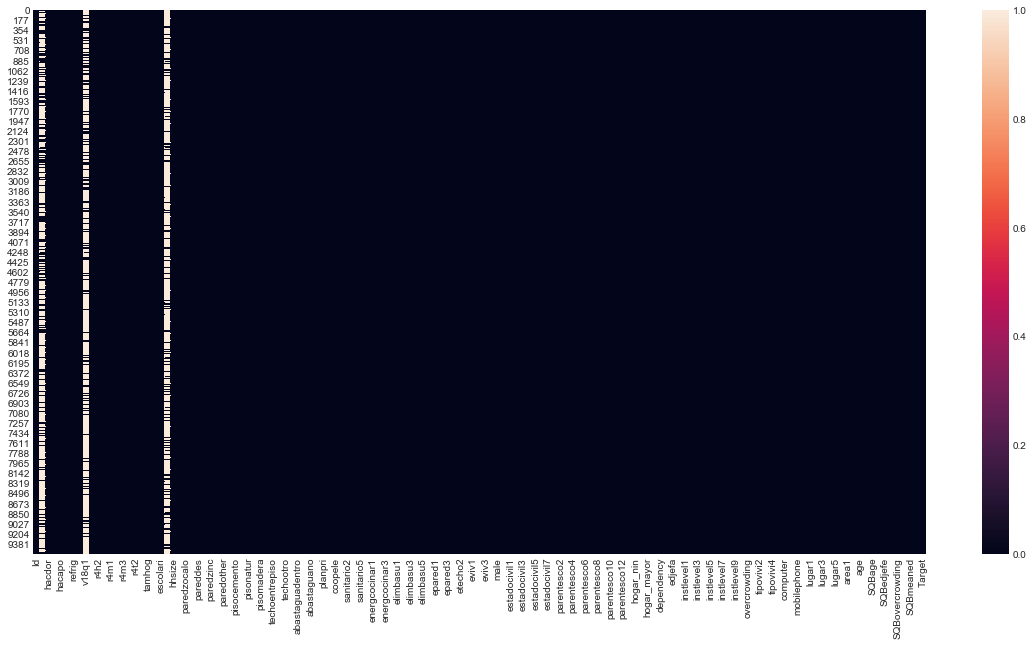

In [335]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(train.isnull())

1. Here, we are going to extrapolate and fill in the prices on V2a1. These are prices for monthly rent

In [336]:
#Here, we want to see if other columns that show whether house is paid for or not affects the rent prices
roomrent = train[['v2a1','tipovivi1','tipovivi2','tipovivi3']]

roomrent[roomrent['v2a1'].isnull() & roomrent['tipovivi1'] != 0]
#It seems MOST people who have NaN have their houses owned, as seen in tipovivi1


,v2a1,tipovivi1,tipovivi2,tipovivi3
2,NaN,1,0,0
13,NaN,1,0,0
14,NaN,1,0,0
26,NaN,1,0,0
32,NaN,1,0,0
33,NaN,1,0,0
34,NaN,1,0,0
35,NaN,1,0,0
36,NaN,1,0,0
42,NaN,1,0,0


In [337]:
#fill this in with 0 because people own that stuff
train['v2a1'].fillna(0, inplace=True)
test['v2a1'].fillna(0, inplace=True)

Above, we replaced the NaN values in income to the mean.

2. Next, we take care of 'meaneduc' and 'SQBmeaned'

In [340]:
educ = train[train['meaneduc'].isnull()][['Id','idhogar','escolari']]

educ

#Here, we just made a dataframe of all meaneduc where it is null, and brought 3 columns with us, id, idhogar, escolari

,Id,idhogar,escolari
1291,ID_bd8e11b0f,1b31fd159,10
1840,ID_46ff87316,a874b7ce7,6
1841,ID_69f50bf3e,a874b7ce7,4
2049,ID_db3168f9f,faaebf71a,12
2050,ID_2a7615902,faaebf71a,12


In [341]:
me=educ.groupby('idhogar')['escolari'].mean().reset_index()
me
#group them to see if it's same people, then reset index so they are not 1291,1840,1841,2049

,idhogar,escolari
0,1b31fd159,10
1,a874b7ce7,5
2,faaebf71a,12


In [342]:
for row in educ.iterrows():
    idx=row[0]
    idhogar=row[1]['idhogar']
    m=me[me['idhogar']==idhogar]['escolari'].tolist()[0]
    train.at[idx, 'meaneduc']=m
    train.at[idx, 'SQBmeaned']=m*m
    
    #I dont know wtf this does. 

2. Here, we will look at the Nans in the v18q1, tablets the household owns.

In [352]:
train[train['v18q'] == 0][['v18q1']].isnull().any()


v18q1    True
dtype: bool

Here, we just see that all people that don't own a tablet have a nan, so therefore, it is 0!

In [ ]:
data['v18q1']=data['v18q1'].fillna(0)


### 3. Next, we looka t the column rez_esc ###Years behind in school


In [365]:
train[train['rez_esc'].isnull()][['age','escolari','rez_esc','edjefe','edjefa','SQBescolari']]


,age,escolari,rez_esc,edjefe,edjefa,SQBescolari
0,43,10,NaN,10,0,100
1,67,12,NaN,12,0,144
2,92,11,NaN,0,11,121
4,37,11,NaN,11,0,121
5,38,11,NaN,11,0,121
8,30,9,NaN,9,0,81
9,28,11,NaN,9,0,121
11,18,12,NaN,0,11,144
12,34,11,NaN,0,11,121
13,79,4,NaN,0,4,16


In [366]:
train['rez_esc']=train['rez_esc'].fillna(0)
#fill with 0 because nans are either adults or children before school age
